<h3>Support Vector Machine (SVM)</h3>

<h4> SVM is for classification, as per given data , In the first plot, if we are taking Building area and Landsize: H is easy to classify, t cannot be seen in plot:when kernel is Sigmoid, however when we check count of each type, we can see T data in file </h4>

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite



   h    t    u 
4005  603  680 

Warning message in filled.contour(xr, yr, matrix(as.numeric(preds), nrow = length(xr), :
"NAs introduced by coercion"Warning message in filled.contour(xr, yr, matrix(as.numeric(preds), nrow = length(xr), :
"NAs introduced by coercion"

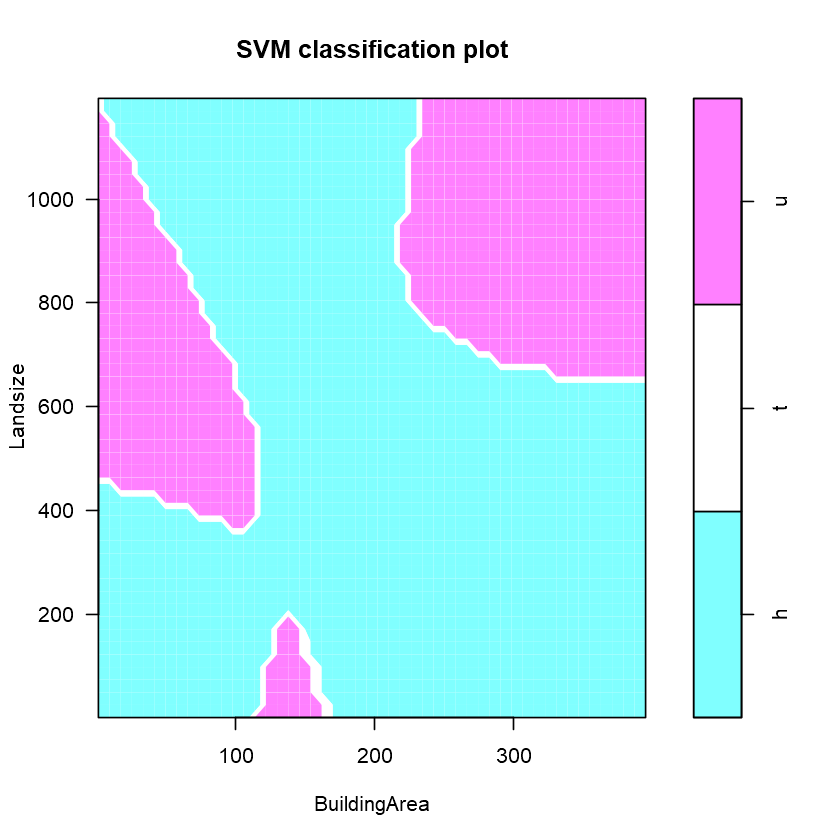

Warning message in filled.contour(xr, yr, matrix(as.numeric(preds), nrow = length(xr), :
"NAs introduced by coercion"

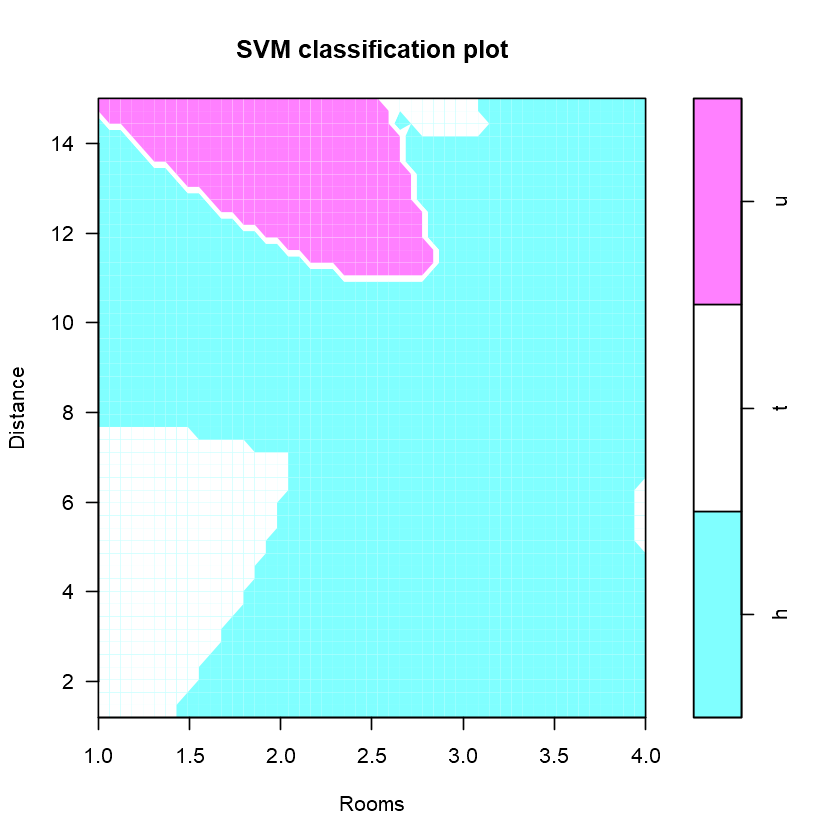

Warning message in filled.contour(xr, yr, matrix(as.numeric(preds), nrow = length(xr), :
"NAs introduced by coercion"

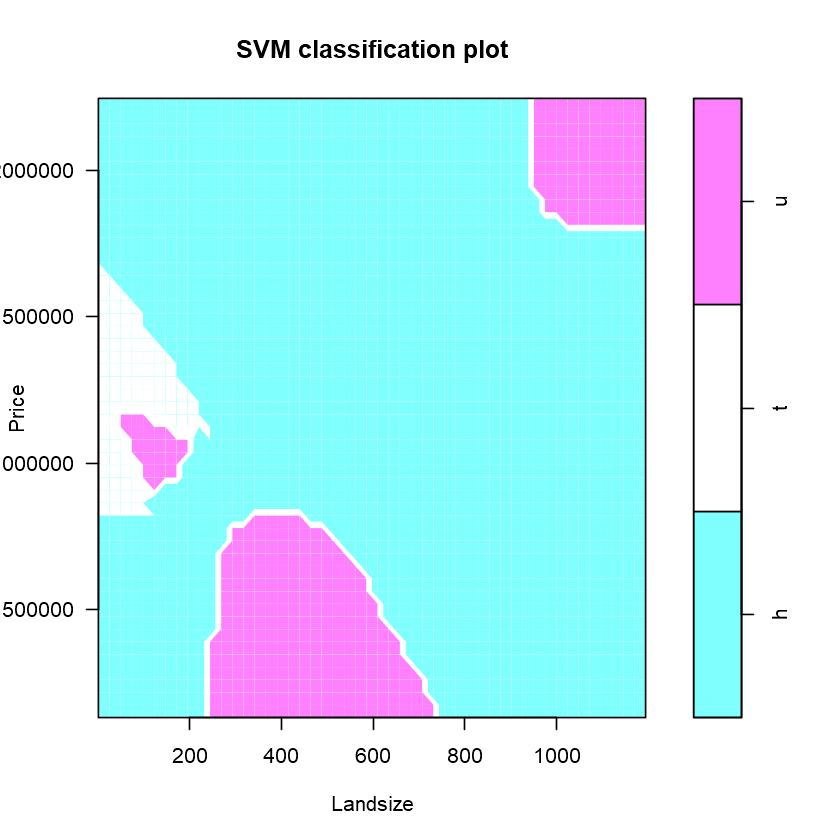

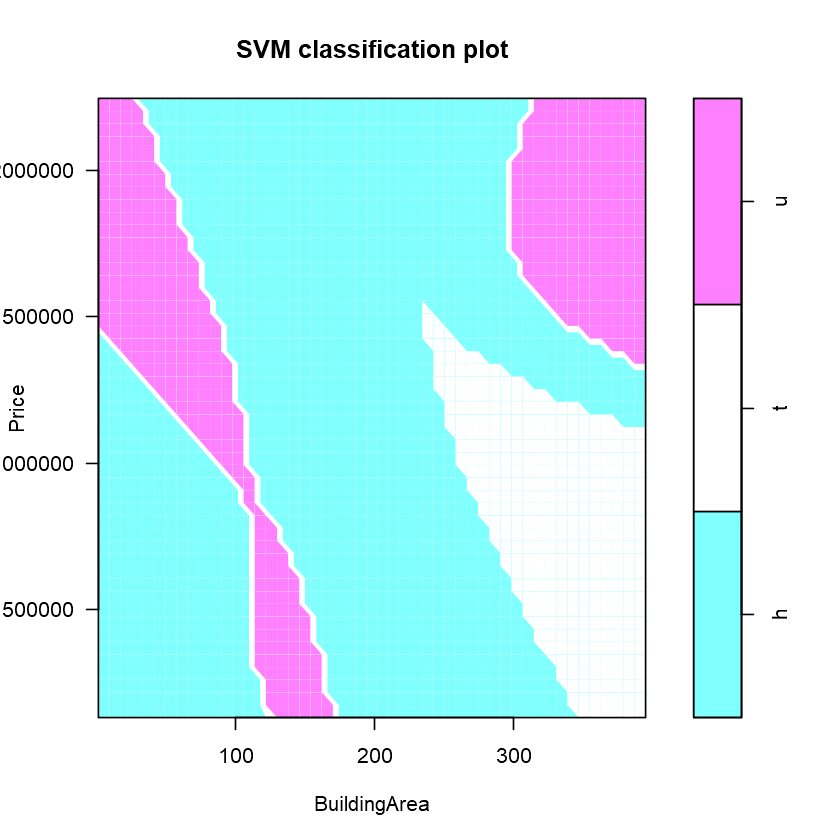

In [1]:
##We are finding which variables are driving to fall the house in category type h,t,u
##clasifying type variables h,t,u according to different combination of varaibles.
#h - house,cottage,villa, semi,terrace
#u - unit, duplex
#t - townhouse
library("e1071")
library("sqldf")
RawD <- read.csv("C:\\Realestate\\CleanedRE.csv", header=TRUE,
                stringsAsFactors =FALSE,
                strip.white =TRUE,
                sep = ',', na.strings=c("","NA"))
RE8 <- na.omit(RawD)
#only selected numeric variables and one categorical variable(one categorical is required for svm, here it is type)
xRE8 <- sqldf("select Rooms, Price, Distance, Bedroom2, Car, Landsize, BuildingArea, Type from RE8")
#RE8.Partial columns we have took, one should be categorical column and other two x and y variables,
##make different models by taking different x and y columns,x and y parameters should be meaningful
###MODEL1###
#Conclusion:Landsize 410 to 1000, 610-1000 & above and building area 100 , 220 & above its definitely "u" category
#Landsize 400, 630, 200-380 and building area 100,180-210, 180&above its definitely "h"
RE8.Part1 <- xRE8[, c(6,7,8)]
table(RE8.Part1$Type)
#below xRE8$Type~. is not y axis, it is the parameter we want to find(dependent variable~with all independent variables)
fit = svm(xRE8$Type ~ ., data=RE8.Part1, 
          type='C-classification', kernel='sigmoid')
plot(fit, RE8.Part1)

###MODEL2###
#Conclusion: Distance 11-14 and rooms 1-2.5 it's definitely "u"
#distance 8-11 and rooms 2-4 its definitely "h"
#distance 1-8 and rooms 1-2 it's definitely "t"
RE8.Part2 <- xRE8[, c(3,1,8)]
fit = svm(xRE8$Type ~ ., data=RE8.Part2, 
          type='C-classification', kernel='sigmoid')
plot(fit, RE8.Part2)

###MODEL3###
#Conclusion: with price upto 8 lakh, 18 above and landsize 210-700, 900 above it's definitely "u"
#with price upto 10 lakh-16 lakh and landsize above 800 its "h"

RE8.Part3 <- xRE8[, c(2,6,8)]
fit = svm(xRE8$Type ~ ., data=RE8.Part3, 
          type='C-classification', kernel='sigmoid')
plot(fit, RE8.Part3)

###MODEL4###
#Conclusion: with price 15-20 lakh and building area upto 100 and 300 above its "u"
#with price upto 12 lakh, 15-20 lakh, buildig area 180-250 its "h"
#with price upto 12 lakh and building area 280 above its "t"
RE8.Part4 <- xRE8[, c(2,7,8)]
fit = svm(xRE8$Type ~ ., data=RE8.Part4, 
          type='C-classification', kernel='sigmoid')
plot(fit, RE8.Part4)
